# Loading and combining all training files

In [1]:
import os
import pandas as pd

train_dir = "data/train/"

dfs = []
for file in os.listdir(train_dir):
  if file.endswith(".csv"):
    path = os.path.join(train_dir, file)
    df = pd.read_csv(path)
    dfs.append(df)

train = pd.concat(dfs, ignore_index=True)
print("Training shape:", train.shape)
print("Columns:", train.columns.tolist())


Training shape: (5443515, 23)
Columns: ['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y', 'player_to_predict', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']


# EDA

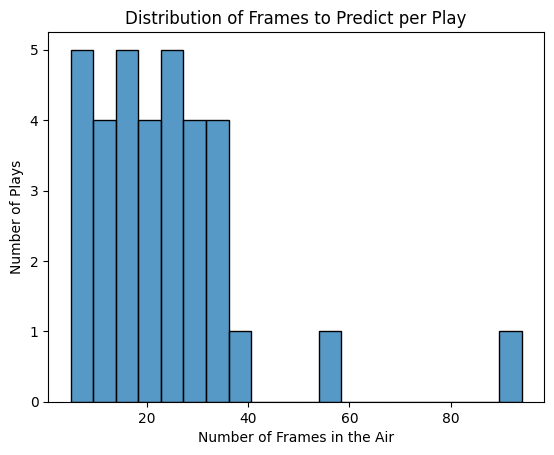

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['num_frames_output'].unique(), bins=20)
plt.title('Distribution of Frames to Predict per Play')
plt.xlabel('Number of Frames in the Air')
plt.ylabel('Number of Plays')
plt.show()

In [5]:
sample_play_df = train[(train['game_id'] == train['game_id'].iloc[0]) & (train['play_id'] == train['play_id'].iloc[0])]

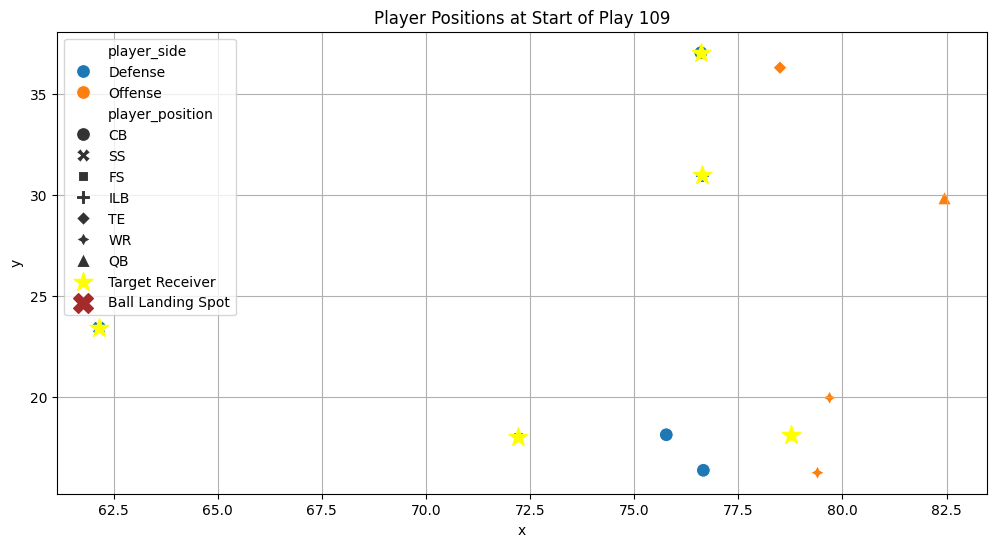

In [6]:
start_frame = sample_play_df[sample_play_df['frame_id'] == 1]

ball_x = start_frame['ball_land_x'].iloc[0]
ball_y = start_frame['ball_land_y'].iloc[0]

target_player = start_frame[start_frame['player_to_predict'] == True]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=start_frame, x='x', y='y', hue='player_side', s=100, style='player_position')

plt.scatter(target_player['x'], target_player['y'], color='yellow', s=200, marker='*', label='Target Receiver')

plt.scatter(ball_x, ball_y, color='brown', s=200, marker='X', label='Ball Landing Spot')

plt.title(f"Player Positions at Start of Play {start_frame['play_id'].iloc[0]}")
plt.legend()
plt.grid(True)
plt.show()